In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:08<00:00, 227MB/s]
100% 1.06G/1.06G [00:08<00:00, 141MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,BatchNormalization,MaxPooling2D
import matplotlib.pyplot as plt


In [8]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    image_size=(256,256),
    batch_size=32
)

Found 20000 files belonging to 2 classes.


In [9]:
val_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    image_size=(256,256),
    batch_size=32
)

Found 5000 files belonging to 2 classes.


In [20]:
model=Sequential()
model.add(Conv2D(32,activation='relu',input_shape=(256,256,3),kernel_size=(3,3),padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,activation='relu',kernel_size=(3,3),padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [21]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [22]:
history=model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
625/625 [==============================] - 68s 103ms/step - loss: 1.3679 - accuracy: 0.5871 - val_loss: 0.5961 - val_accuracy: 0.6594
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5946 - accuracy: 0.6863 - val_loss: 0.5445 - val_accuracy: 0.7162
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5141 - accuracy: 0.7526 - val_loss: 0.5087 - val_accuracy: 0.7342
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4308 - accuracy: 0.7990 - val_loss: 0.5470 - val_accuracy: 0.7162
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3592 - accuracy: 0.8385 - val_loss: 0.6193 - val_accuracy: 0.7798
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2963 - accuracy: 0.8753 - val_loss: 0.6376 - val_accuracy: 0.7902
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2302 - accuracy: 0.9071 - val_loss: 0.4947 - val_ac

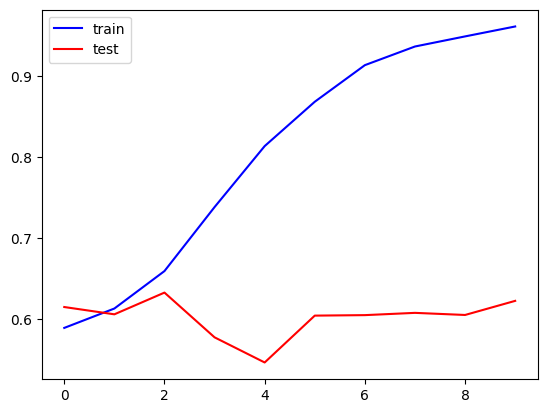

In [18]:
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='test')
plt.legend()





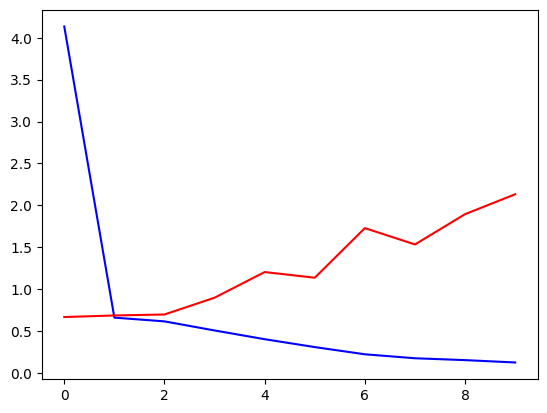

In [17]:
plt.plot(history.history['loss'],color='blue',label='train')

plt.plot(history.history['val_loss'],color='red',label='test')



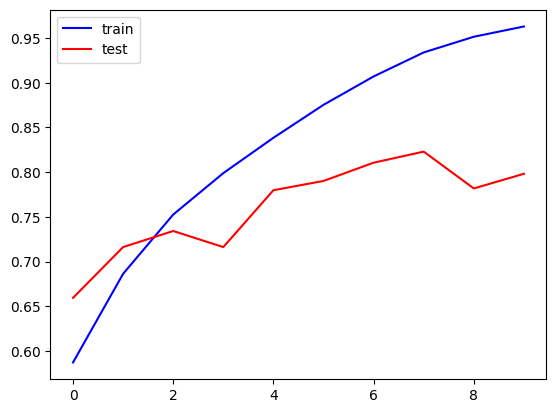

In [23]:
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='test')
plt.legend()





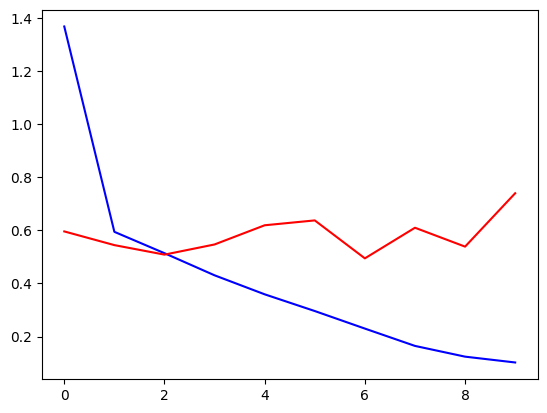

In [24]:
plt.plot(history.history['loss'],color='blue',label='train')

plt.plot(history.history['val_loss'],color='red',label='test')



In [25]:
import cv2

In [38]:
test_img=cv2.imread('/content/funny-cat-257-01.jpg')
test_img1=cv2.imread('/content/11_20221353_147ccd_2752698a.jpg')

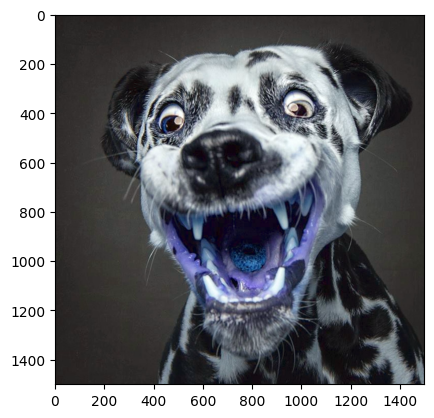

In [39]:
plt.imshow(test_img)
plt.imshow(test_img1)

In [40]:
test_img=cv2.resize(test_img,(256,256))
test_img1=cv2.resize(test_img1,(256,256))

In [44]:
test_input=test_img.reshape((1,256,256,3))
test_input1=test_img1.reshape((1,256,256,3))

In [42]:
model.predict(test_input1)

1/1 [==============================] - 0s 28ms/step


array([[0.98872966]], dtype=float32)